Titanic Survival Pridiction

Task 1 : Problem Statement :-

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

Importing important libraries 

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score  

Reading the .csv data file :

In [41]:
tsp= pd.read_csv("Data/tested.csv")

In [42]:
tsp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploring and Cleaning data :

In [43]:
tsp.shape

(418, 12)

In [44]:
tsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Looking for null values:

In [45]:
tsp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Removing the unnessary column as it contains large amount of null values

In [46]:
tsp = tsp.drop(columns='Cabin', axis = 1,)

Replacing the null values in age column with mean value

In [47]:
tsp['Age'].fillna(tsp['Age'].mean(), inplace=True)

Replacing the null values in fare column with mean value

In [48]:
tsp['Fare'].fillna(tsp['Fare'].mean(), inplace=True)

In [49]:
tsp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
tsp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Counting the number of people survived and not survived

In [51]:
tsp['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Counting the number of people based on Gender

In [52]:
tsp['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

Counting the number of people based on Pclass

In [53]:
tsp['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Visualizing the data : 

In [54]:
sns.set()

Creating count plot  for survived column 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival Count (0 = No, 1 = Yes)')

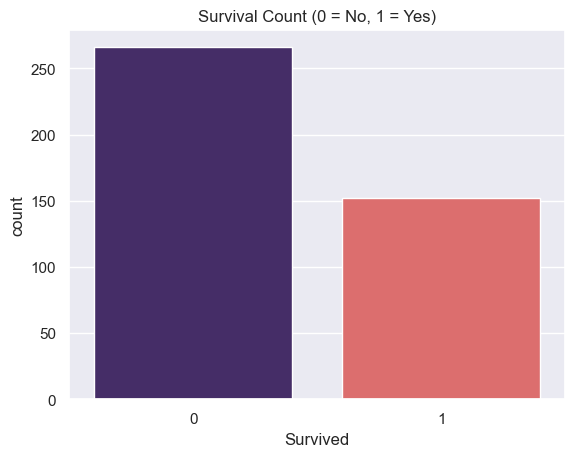

In [55]:
sns.countplot(tsp['Survived'],palette=['#432371',"#ef5b5b"]).set_title('Survival Count (0 = No, 1 = Yes)')

In [56]:
tsp['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

Analyzing Survival rate based on Sex :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival Count (0 = No, 1 = Yes)')

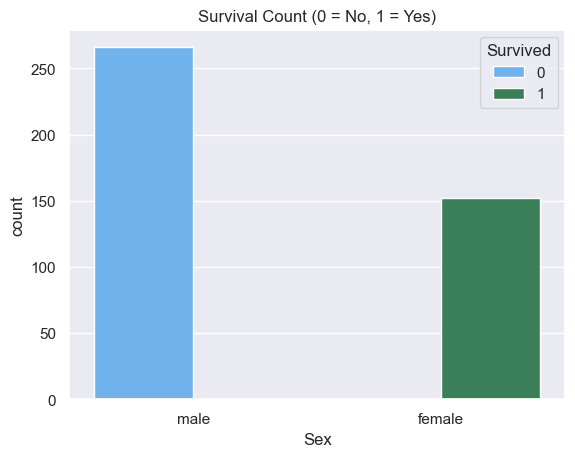

In [57]:
sns.countplot('Sex', hue='Survived', data=tsp, palette=['#5CB3FF',"#2E8B57"]).set_title('Survival Count (0 = No, 1 = Yes)')

In [58]:
tsp['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Analyzing Survival rate based on Pclass :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival Count (0 = No, 1 = Yes)')

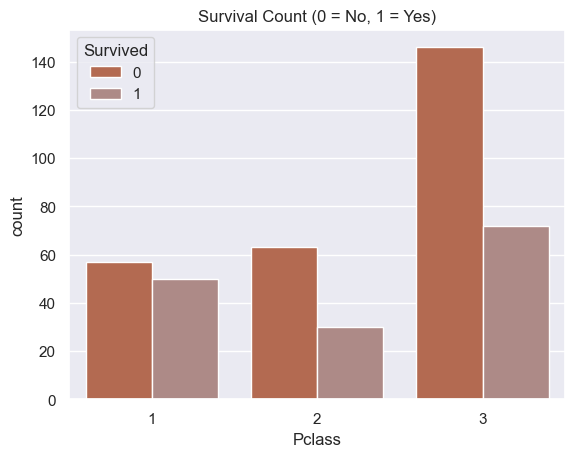

In [59]:
sns.countplot('Pclass', hue='Survived', data=tsp, palette=['#C36241',"#B38481"]).set_title('Survival Count (0 = No, 1 = Yes)')

Analyzing Survival rate based on Age :

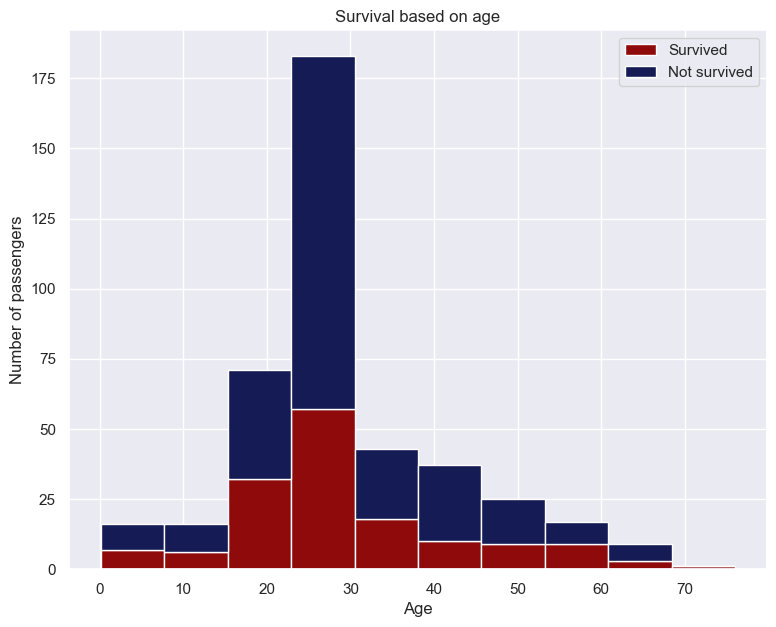

In [60]:
fig = plt.figure(figsize =(9, 7))
plt.hist(x =[tsp[tsp['Survived']==1]['Age'],tsp[tsp['Survived']==0]['Age']],stacked=True, color = ['#8F0B0B','#151B54'],label = ['Survived','Not survived'])
plt.title('Survival based on age')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()


Now lets encode the categorical columns :

In [61]:
tsp['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [62]:
#Conversion of categorical columns to numeric columns :
tsp.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [63]:
tsp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating our features and target columns for machine learning prediction :

In [64]:
X=tsp.drop(columns =['PassengerId','Name','Ticket','Survived'],axis=1)

In [65]:
Y=tsp['Survived']

In [66]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [67]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

Splitting the data into training data and test data

In [68]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [69]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training - Logistic Regression

In [70]:
model=LogisticRegression()

In [71]:
model.fit(X_train, Y_train)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.please try loading this page with nbviewer.org.

Model Evaluation

Accuracy Score for training data:

In [ ]:
X_train_prediction=model.predict(X_train)

In [ ]:
print(X_train_prediction)

In [ ]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy score of training data :{:.2f}%'.format(training_data_accuracy*100 ))

Accuracy Score for test data:

In [ ]:
X_test_prediction=model.predict(X_test)

In [ ]:
print(X_test_prediction)

In [ ]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)

print('Accuracy score of test data :{:.2f}%'.format(testing_data_accuracy*100 ))

Conclusion

The logistic algorithm is likely to be a very strong model for the given problem.It has learned the underlying patterns 
and is capable of making accurate predictions in training data on given 'Titanic' dataset